# Тестовое задание Junior Data Analyst

## Оглавление:
* [Часть 1. Работа с данными](#Часть-1.-Работа-с-данными)
** [ Добавление признака цвет (color)](#Добавление-признака-цвет-(color))
** [Обработка дубликатов](#Обработка-дубликатов)
** [Сортировка значений](#Сортировка-значений)
** [Обработка пропущенных значений](#Обработка-пропущенных-значений)
* [Часть 2. Построение графиков](#Часть-2.-Построение-графиков)


## Часть 1. Работа с данными
Входные данные для тестового задания можно найти здесь (или здесь, резервная ссылка).   
Ваша задача - подготовить и обработать исходные данных так, чтобы их можно было использовать во второй части задания.   

Требования к выходным данным:   
   1) В выходной таблице должны остаться только следующие колонки:   
*area, cluster, cluster_name, keyword, x, y, count, color*, где   
●	 area - область,   
●	 cluster - номер кластера,   
●	 cluster_name - название кластера,   
●	 keyword - словосочетание,   
●	 count - показатель,   
●	 x и y - координаты для диаграммы рассеяния,   
●	 color - цвет точки на карте для данного словосочетания   

   2) Колонку color нужно добавить самостоятельно - цвета вы можете взять из цветовых палеток Tableu или по своему усмотрению.   
   3) Цвет задается каждому словосочетанию согласно следующими правилам:     
●	внутри одной области цвета словосочетаний в одном кластере должны быть одинаковые, в разных - отличаться (например, у "Кластер 1" все слова будут окрашены в красный, у "Кластер 2" - в зеленый и т.д.)   
●	цвета кластеров в разных областях могут повторяться   
●	цвета кластеров в разных областях с разным номером не имеют никакой связи (у одной области [area] слова из "Кластер 1" могут быть красного цвета, в другой области у слов из "Кластер 1" может быть другой цвет)   
   4) Не должно быть дубликатов слов в одной и той же области (area), но словосочетание может повторяться из area в area   
   5) Колонки должны называться именно так, как указано в п.1   
   6) Сортировка должна происходить по колонкам area, cluster, cluster_name, count (по count значения сортируются в убывающем порядке, в остальных - по возрастающему).   
   7) Количество переданных в исходных ключевых слов должно совпадать с количество слов в выходных данных (за исключением дублированных строк или строк с пустыми\неформатными значениями по ключевым показателям [перечислены в п. 1], если такие имеются).   
   8) Никакие другие особенности оформления не должны учитываться при обработке данных (заливка и пр.)   
   9) Выходные данные должны быть аккуратно оформлены (заголовки закреплены, включен фильтр)   

Формат представления выходных данных: google spreadsheet-таблица.   

Выполнение данной работы желательно с помощью одной из библиотек:   
●	data.table ( R )   
●	pandas  (Python)   


In [383]:
# Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from adjustText import adjust_text
from matplotlib.lines import Line2D
from plotly.subplots import make_subplots

In [273]:
#Импортируем исследуемые данные
data = pd.read_csv('https://docs.google.com/spreadsheets/d/165sp-lWd1L4qWxggw25DJo_njOCvzdUjAd414NSE8co/export?format=csv')
data

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823,3.283940,4.39674063521296
...,...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,1.0,279,10.971214,4.857810387061303
225,greetings,2.0,Кластер 2,sapphire grounds,1.0,335,1.160626,3.642819729434763
226,greetings,3.0,Кластер 3,entire ethical speakers,1.0,1782,7.985910,6.003699268483375
227,greetings,3.0,Кластер 3,courtesy textiles diameter,1.0,84,0.509490,4.151198803764073


В данных имеем 229 приверов, 8 признаков. Признак color, необходимый к заполнению, отсутствует.

In [296]:
#Убираем из рассмотрения признак good (1)
df = data[['area', 
           'cluster', 
           'cluster_name', 
           'keyword', 
           'x', 
           'y', 
           'count']]
df

,area,cluster,cluster_name,keyword,x,y,count
0,eligibility,0.0,Кластер 0,several animated buried,5.772342,12.564796257345005,1260
1,eligibility,0.0,Кластер 0,singles unusual buyers,14.829280,7.8507285727125815,866
2,eligibility,0.0,Кластер 0,hawaiian directive,11.381856,3.8981370219558604,163
3,eligibility,0.0,Кластер 0,dynamics directly,9.980149,6.281427914064545,1146
4,eligibility,1.0,Кластер 1,decision surgeons montreal,3.283940,4.39674063521296,823
...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,10.971214,4.857810387061303,279
225,greetings,2.0,Кластер 2,sapphire grounds,1.160626,3.642819729434763,335
226,greetings,3.0,Кластер 3,entire ethical speakers,7.985910,6.003699268483375,1782
227,greetings,3.0,Кластер 3,courtesy textiles diameter,0.509490,4.151198803764073,84


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          228 non-null    object 
 1   cluster       228 non-null    float64
 2   cluster_name  228 non-null    object 
 3   keyword       228 non-null    object 
 4   x             228 non-null    float64
 5   y             228 non-null    object 
 6   count         227 non-null    object 
dtypes: float64(2), object(5)
memory usage: 12.6+ KB


В данных существует 1 незаполненое занчение для признаков area, cluster, cluster_name, keyword, x и y. И 2 пропущенных значения для признака count.   

### Добавление признака цвет (color)

Для выполнения исходного задания необходимо сформировать для текущих данных новый признак цвет. Данный признак будет содержать цвет, определяющий кластер определенной категории. Так как по условиям не имеет значения связь цвета клатеров между областями, для удобства определим цвет для каждого кластера одинаковым из области в облать.

Для хорошей цветовой восприимчивости воспользуемся готовой цветовой палитрой husl пакета seaborn.

In [365]:
palt = sns.color_palette("husl", 9)
palt

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

In [372]:
set(df.cluster)

{0.0, 1.0, 2.0, 3.0}

In [381]:
df['color'] = 'a'
#Выберем 4 понравившихся цвета (по количеству кластеров)
color_list = [palt.as_hex()[4]] + palt.as_hex()[-3:]

#Зададим функцию определения цвета каждому кластеру
j=-1
def i(x):
    global j
    j=j+1
    return color_list[j]

df2 = df[['area', 'cluster_name', 'color']].copy()
df2.area = df.area.astype('str')
df2.cluster_name = df.cluster_name.astype('str')
#Определим цвета кластеров области
df['color'] = df2.groupby(by=['cluster_name']).color.transform(i)

df

C:\Users\Shito\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shito\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,area,cluster,cluster_name,keyword,x,y,count,color,words_count,keyword2
108,ar\vr,0.0,Кластер 0,reservations linking,10.195602,12.259496,751.0,#34ae91,2,reservations\nlinking
107,ar\vr,0.0,Кластер 0,interfaces neutral,10.443533,13.809915,586.0,#34ae91,2,interfaces\nneutral
109,ar\vr,0.0,Кластер 0,committees parallel,6.735260,3.613983,173.0,#34ae91,2,committees\nparallel
106,ar\vr,0.0,Кластер 0,written conflict fabulous,2.991167,7.106799,1443.0,#34ae91,3,written\nconflict\nfabulous
111,ar\vr,1.0,Кластер 1,filling volunteers academics,10.833920,8.652737,773.0,#3ba3ec,3,filling\nvolunteers\nacademics
...,...,...,...,...,...,...,...,...,...,...
99,worlds,2.0,Кластер 2,applicants vacuum distance restrictions,11.916011,0.683175,1785.0,#bb83f4,4,applicants\nvacuum\ndistance\nrestrictions
101,worlds,2.0,Кластер 2,operating stevens,11.535669,4.165849,1382.0,#bb83f4,2,operating\nstevens
105,worlds,3.0,Кластер 3,immunology plates,2.407028,7.651527,1653.0,#f564d4,2,immunology\nplates
103,worlds,3.0,Кластер 3,holdings herbal,3.986508,10.906340,1476.0,#f564d4,2,holdings herbal


### Обработка дубликатов

По условиям исследования данные не должны содержать повторяющихся словосочетаний в пределах одной области. Данное условия можно обработать несколькими способами:
1. Выбрать одну из строчек "дубликатов" (первую, последнюю или среднюю).
2. Применить аггрегирующую функцию к признакам строк дубликатов.   

Так как в условии исследования данный параметр определен не был, выбор метода остается за исследователем. В данном исследовании применим к данным первый способ обработки.

In [302]:
df.drop_duplicates(subset=['area', 'keyword'])

,area,cluster,cluster_name,keyword,x,y,count,color
0,eligibility,0.0,Кластер 0,several animated buried,5.772342,12.564796257345005,1260,#a2a415
1,eligibility,0.0,Кластер 0,singles unusual buyers,14.829280,7.8507285727125815,866,#a2a415
2,eligibility,0.0,Кластер 0,hawaiian directive,11.381856,3.8981370219558604,163,#a2a415
3,eligibility,0.0,Кластер 0,dynamics directly,9.980149,6.281427914064545,1146,#a2a415
4,eligibility,1.0,Кластер 1,decision surgeons montreal,3.283940,4.39674063521296,823,#152eff
...,...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,10.971214,4.857810387061303,279,#65ab7c
225,greetings,2.0,Кластер 2,sapphire grounds,1.160626,3.642819729434763,335,#65ab7c
226,greetings,3.0,Кластер 3,entire ethical speakers,7.985910,6.003699268483375,1782,#77926f
227,greetings,3.0,Кластер 3,courtesy textiles diameter,0.509490,4.151198803764073,84,#77926f


### Сортировка значений

Сортировка должна происходить по колонкам area, cluster, cluster_name, count (по count значения сортируются в убывающем порядке, в остальных - по возрастающему).

In [305]:
df = df.sort_values(by=['area', 'cluster', 'cluster_name', 'count'], ascending=[True]*3+[False])
df

,area,cluster,cluster_name,keyword,x,y,count,color
108,ar\vr,0.0,Кластер 0,reservations linking,10.195602,12.259495712252914,751,#d5ffff
107,ar\vr,0.0,Кластер 0,interfaces neutral,10.443533,13.809914970161072,586,#d5ffff
109,ar\vr,0.0,Кластер 0,committees parallel,6.735260,3.613982972088637,173,#d5ffff
106,ar\vr,0.0,Кластер 0,written conflict fabulous,2.991167,7.106798807182176,1443,#d5ffff
111,ar\vr,1.0,Кластер 1,filling volunteers academics,10.833920,8.652736658281233,773,#947e94
...,...,...,...,...,...,...,...,...
101,worlds,2.0,Кластер 2,operating stevens,11.535669,4.165848723252822,1382,#f0944d
105,worlds,3.0,Кластер 3,immunology plates,2.407028,7.65152738334079,1653,#61de2a
103,worlds,3.0,Кластер 3,holdings herbal,3.986508,10.906339823131932,1476,#61de2a
104,worlds,3.0,Кластер 3,exchanges castle,8.082231,6.587932953846258,1097,#61de2a


### Обработка пропущенных значений

При беглом осмотре данных в предыдущих пунктах работы были обнаружены пропущенных знаечния в даннх. Рассмотрим данные "поближе" для выявления других нетиповых (для библиотеки pandas) записей, отражающих пропущенные знаечния.

In [306]:
#Рассмотрим область принимаемых каждым признаком значений
for i in df:
    print(set(df[i]))

{nan, 'locator', 'greetings', 'personnel', 'housewives', 'protein', 'except', 'worlds', 'capability', 'available', 'winner', 'twisted', 'dialog', 'ar\\vr', 'eligibility', 'lithuania'}
{0.0, 1.0, 2.0, 3.0, nan}
{nan, 'Кластер 2', 'Кластер 0', 'Кластер 1', 'Кластер 3'}
{nan, 'michael tobacco', 'minerals reception', 'receiver astrology', 'rebate classics', 'auditor transparent', 'announces independent', 'holdem configuring', 'announces independent latter senator', 'battery pregnant', 'finishing vanilla', 'finished assigned', 'toronto crisis chamber ceiling', 'sapphire grounds', 'disposition layout', 'collectables departments', 'perfectly department composer', 'effectiveness baskets', 'hawaiian directive', 'heavily responsible', 'postcards looked', 'batteries nipples', 'offset cnetcom applying', 'sapphire grounds justice', 'postcards looked republic detector', 'alternative homeless', 'legends directive', 'mentor reduced posters', 'education evidence', 'simulation allocated wellington', 'va

Можем наблюдать нетипичное для признака y принимаемое знаечние '0x414fe002'. А также запись пропущенных знаенчий для признака count в виде набора символов 'N\\A' и '-'. Рассмотрим признак y, для принятия решения по обработке данного значения:

(0.06080720844153398, 14.923944414158022)

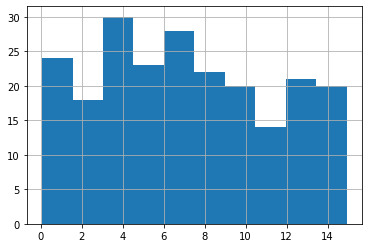

In [307]:
o_y = df.y[df.y!='0x414fe002'].astype('float64')
o_y.hist()
o_y.min(), o_y.max()

О характере распределения по полученной гистограмме частот судить сложно, однако наиболее близки кажется равномерное распределение чисел от 0 до 15. Сгенерируем число случайным образом, для замещения пропущенного или ошибочного числа   '0x414fe002'.

In [308]:
df.loc[df.y=='0x414fe002', 'y'] = np.random.random()*15
df[df.y=='0x414fe002']

,area,cluster,cluster_name,keyword,x,y,count,color


In [309]:
df.y = df.y.astype('float64')

Знаенчия 'N\\A' и '-' заменим на пропущенные знаечни, воспринимаемые библиотекой pandas.

In [310]:
df[(df['count'] == 'N\\A')|(df['count'] == '-')]

,area,cluster,cluster_name,keyword,x,y,count,color
217,greetings,1.0,Кластер 1,diversity unlike,9.195444,11.261367,-,#287c37
49,protein,0.0,Кластер 0,malawi sunset,14.059563,11.980079,N\A,#c5c9c7


In [311]:
df.loc[(df['count'] == 'N\\A')|(df['count'] == '-'), 'count'] = np.nan
df['count'] = df['count'].astype('float64')

In [312]:
#Удалим все примеры, в которых есть пропущенные значения в признаках
df = df.dropna()
df

,area,cluster,cluster_name,keyword,x,y,count,color
108,ar\vr,0.0,Кластер 0,reservations linking,10.195602,12.259496,751.0,#d5ffff
107,ar\vr,0.0,Кластер 0,interfaces neutral,10.443533,13.809915,586.0,#d5ffff
109,ar\vr,0.0,Кластер 0,committees parallel,6.735260,3.613983,173.0,#d5ffff
106,ar\vr,0.0,Кластер 0,written conflict fabulous,2.991167,7.106799,1443.0,#d5ffff
111,ar\vr,1.0,Кластер 1,filling volunteers academics,10.833920,8.652737,773.0,#947e94
...,...,...,...,...,...,...,...,...
99,worlds,2.0,Кластер 2,applicants vacuum distance restrictions,11.916011,0.683175,1785.0,#f0944d
101,worlds,2.0,Кластер 2,operating stevens,11.535669,4.165849,1382.0,#f0944d
105,worlds,3.0,Кластер 3,immunology plates,2.407028,7.651527,1653.0,#61de2a
103,worlds,3.0,Кластер 3,holdings herbal,3.986508,10.906340,1476.0,#61de2a


Запищем полученные данные в csv файл, для дальнейшей загрузки в google sheet.

In [313]:
df.to_csv('outputdata.csv', index=False)

## Часть 2. Построение графиков

В данной части исследования будут построены диаграммы рассеяния для каждой рассматриваемой области данных. 

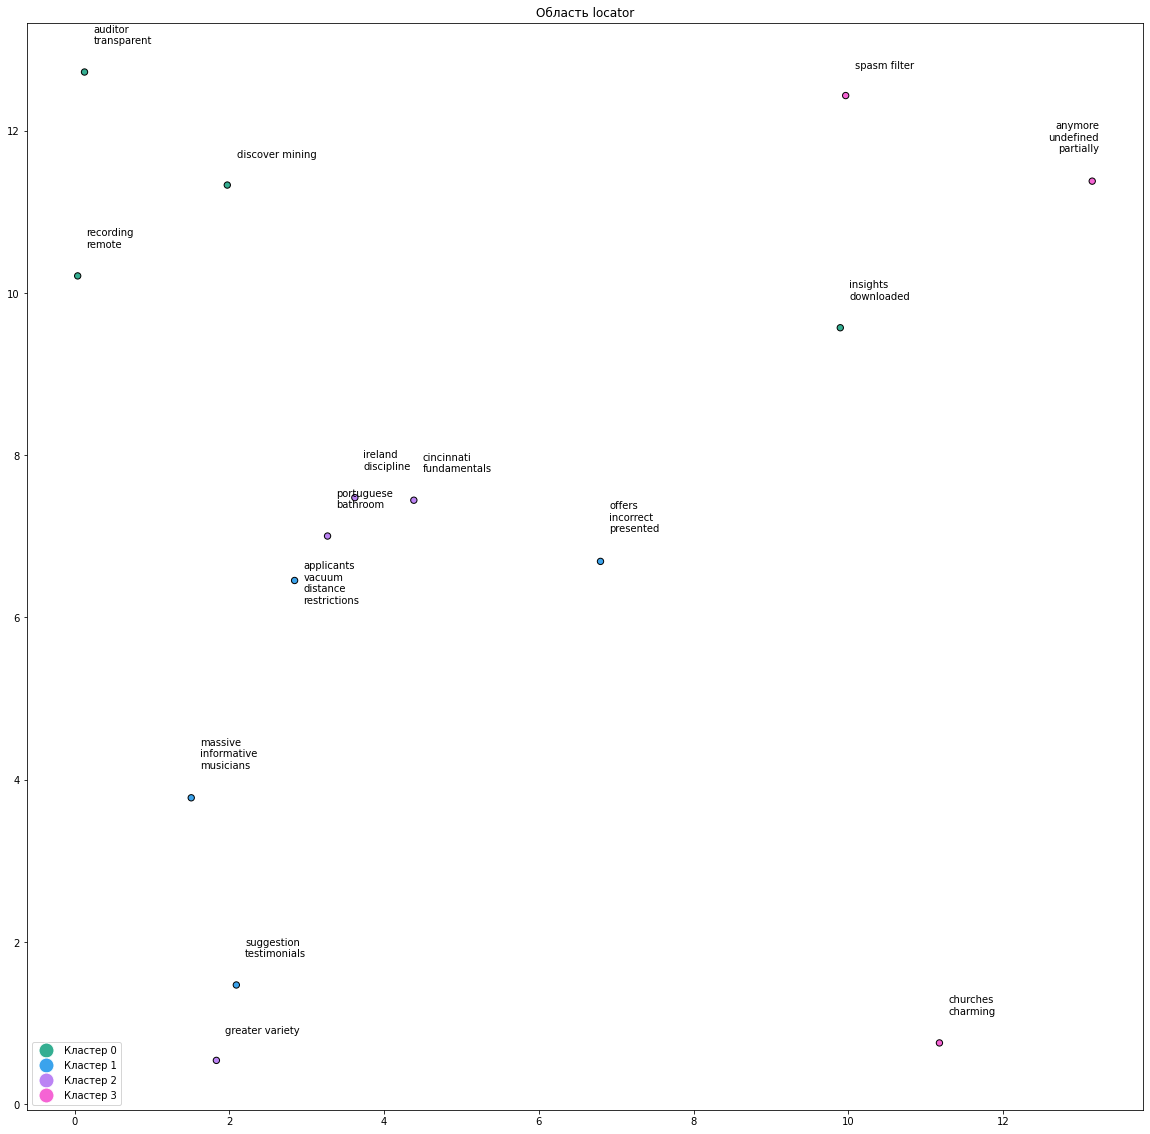

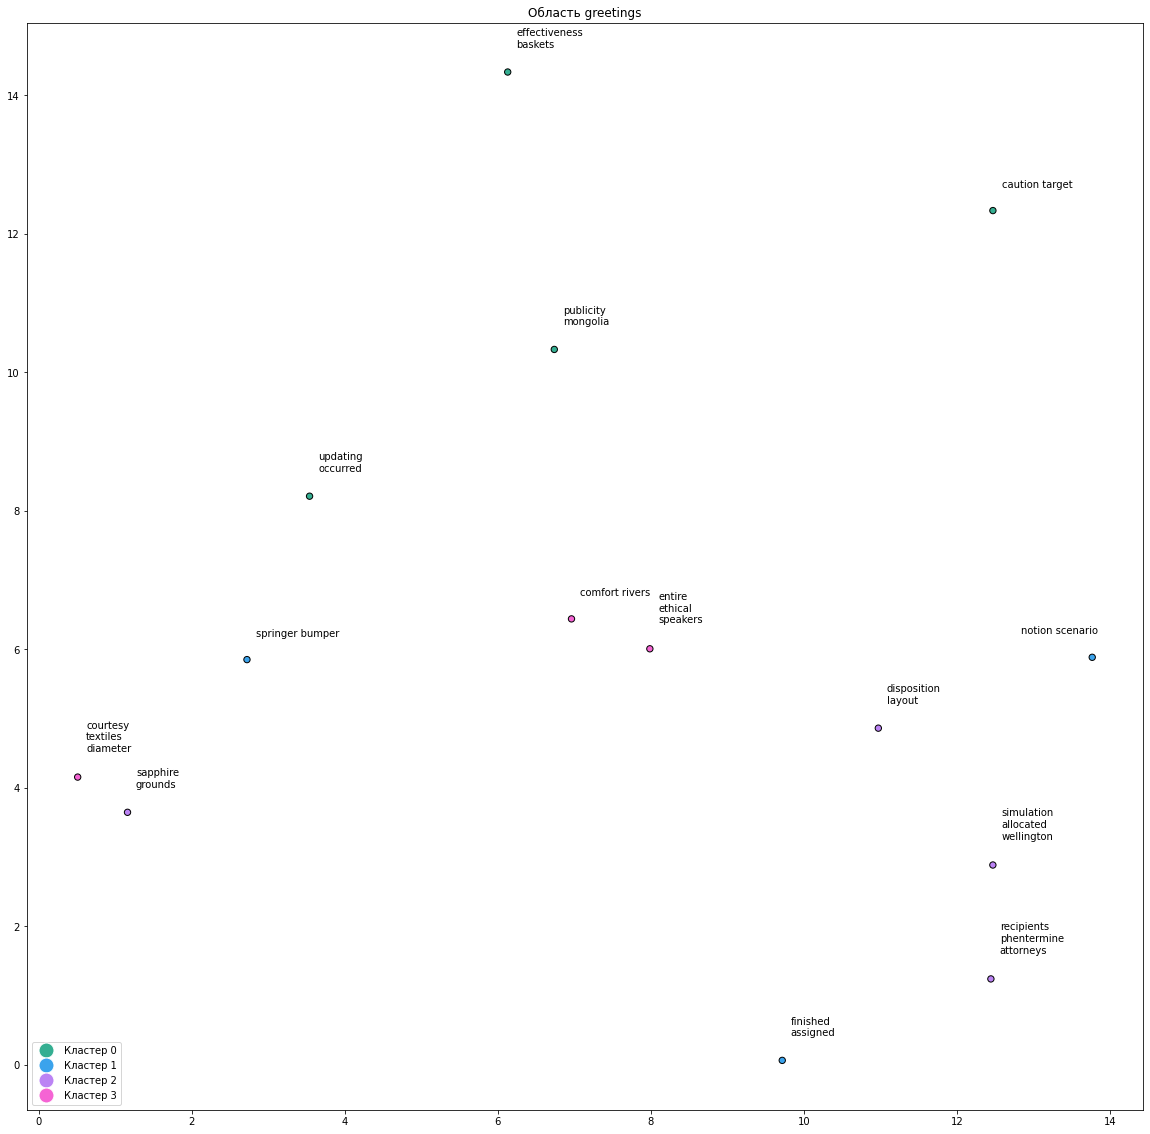

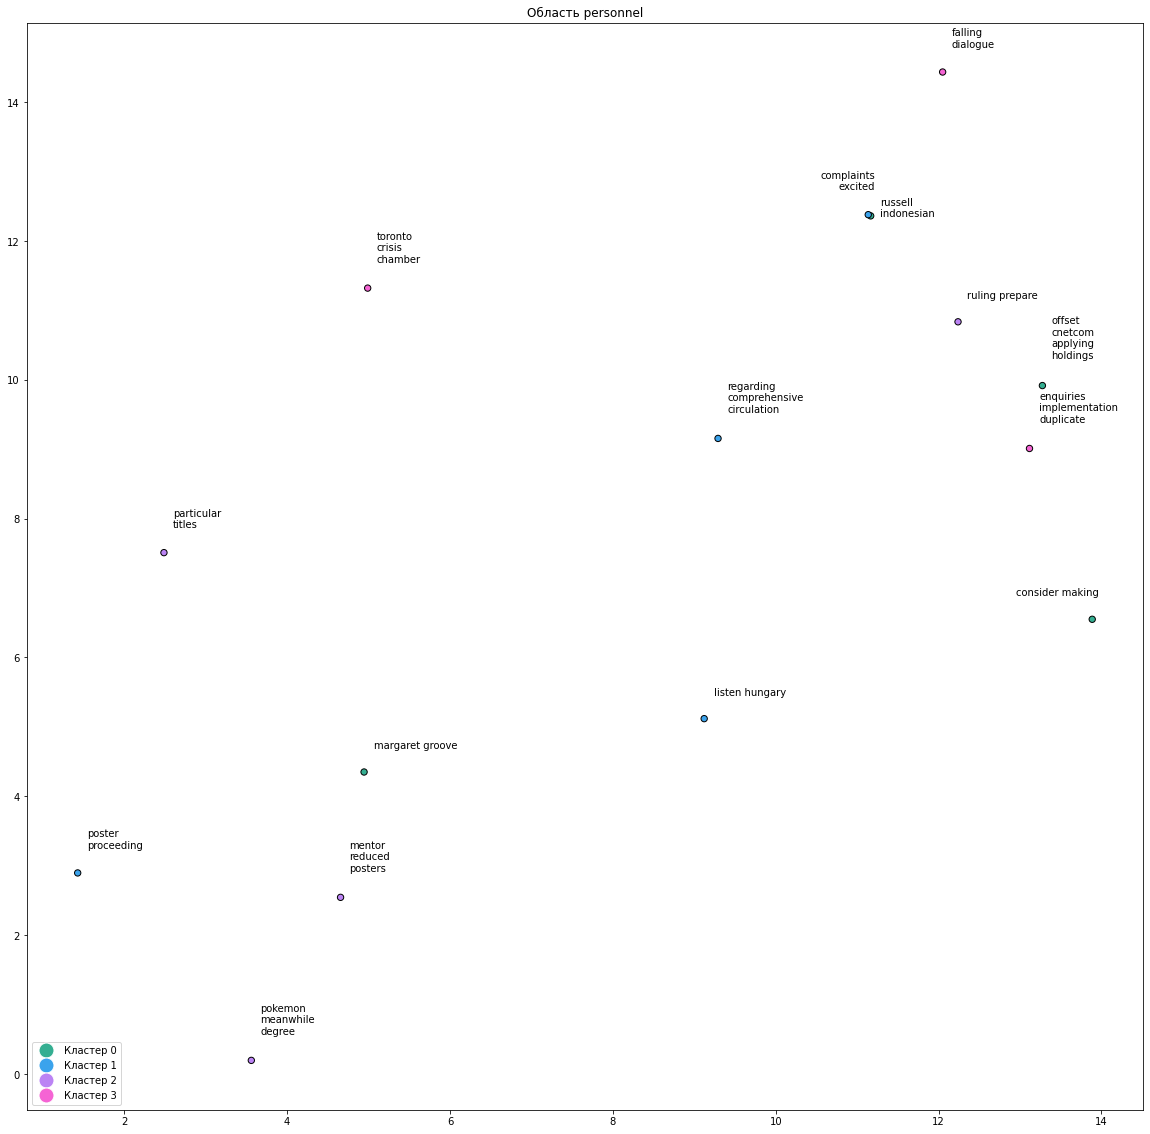

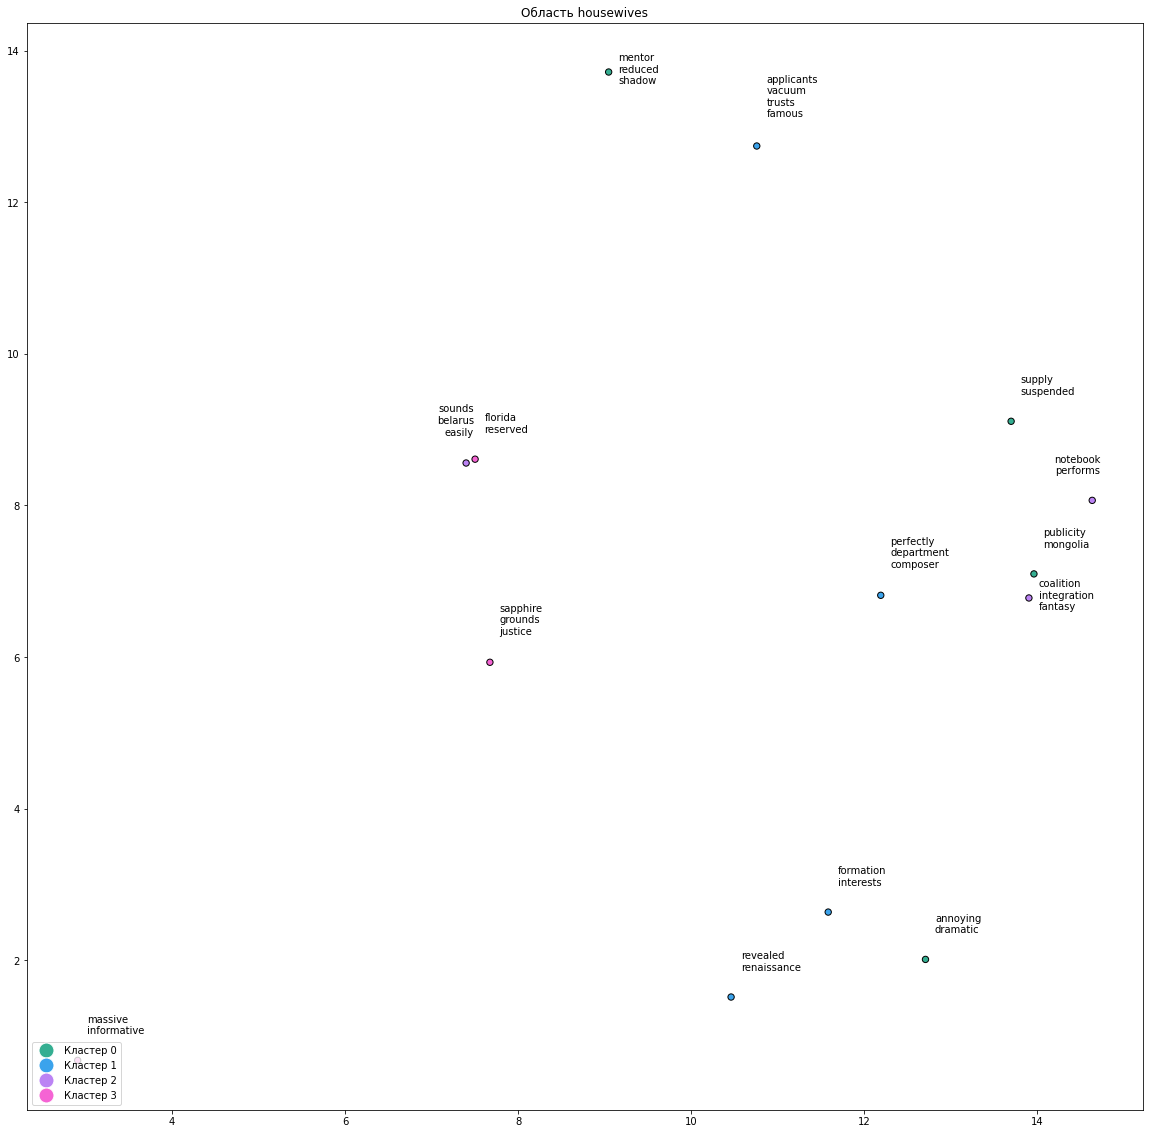

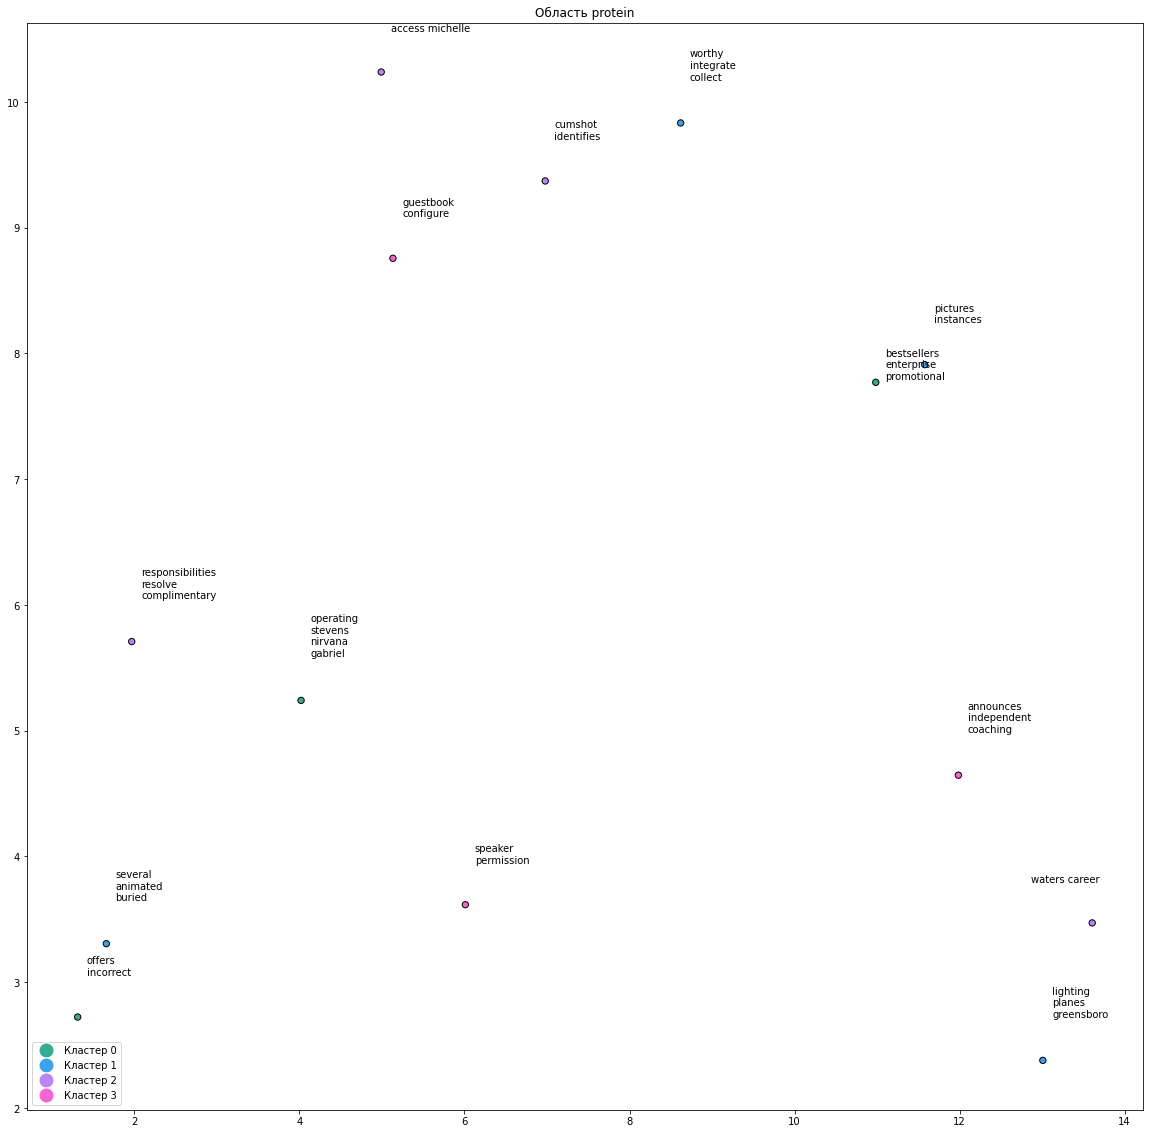

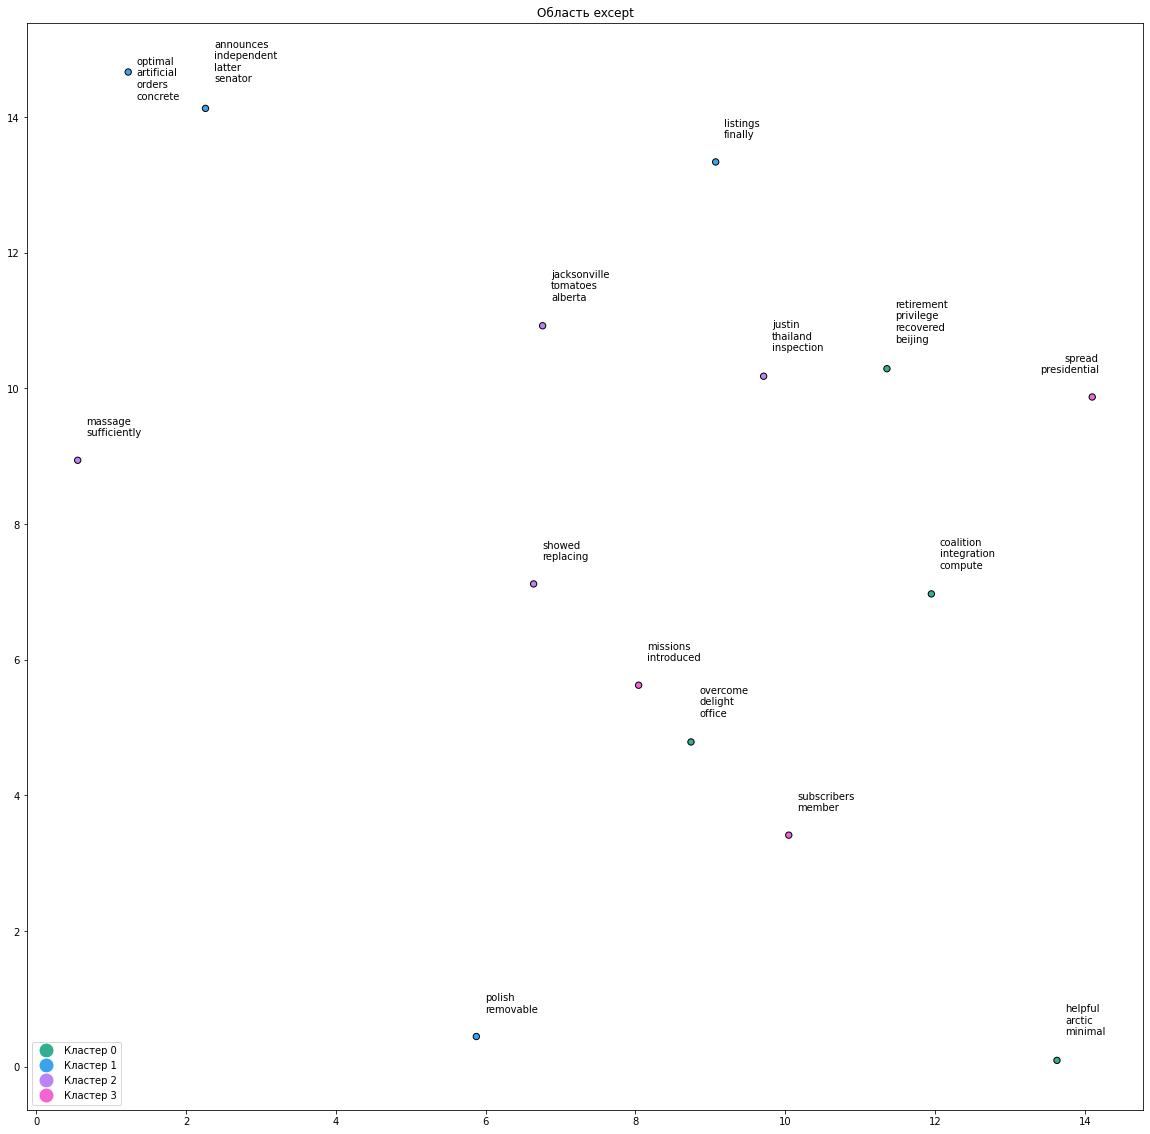

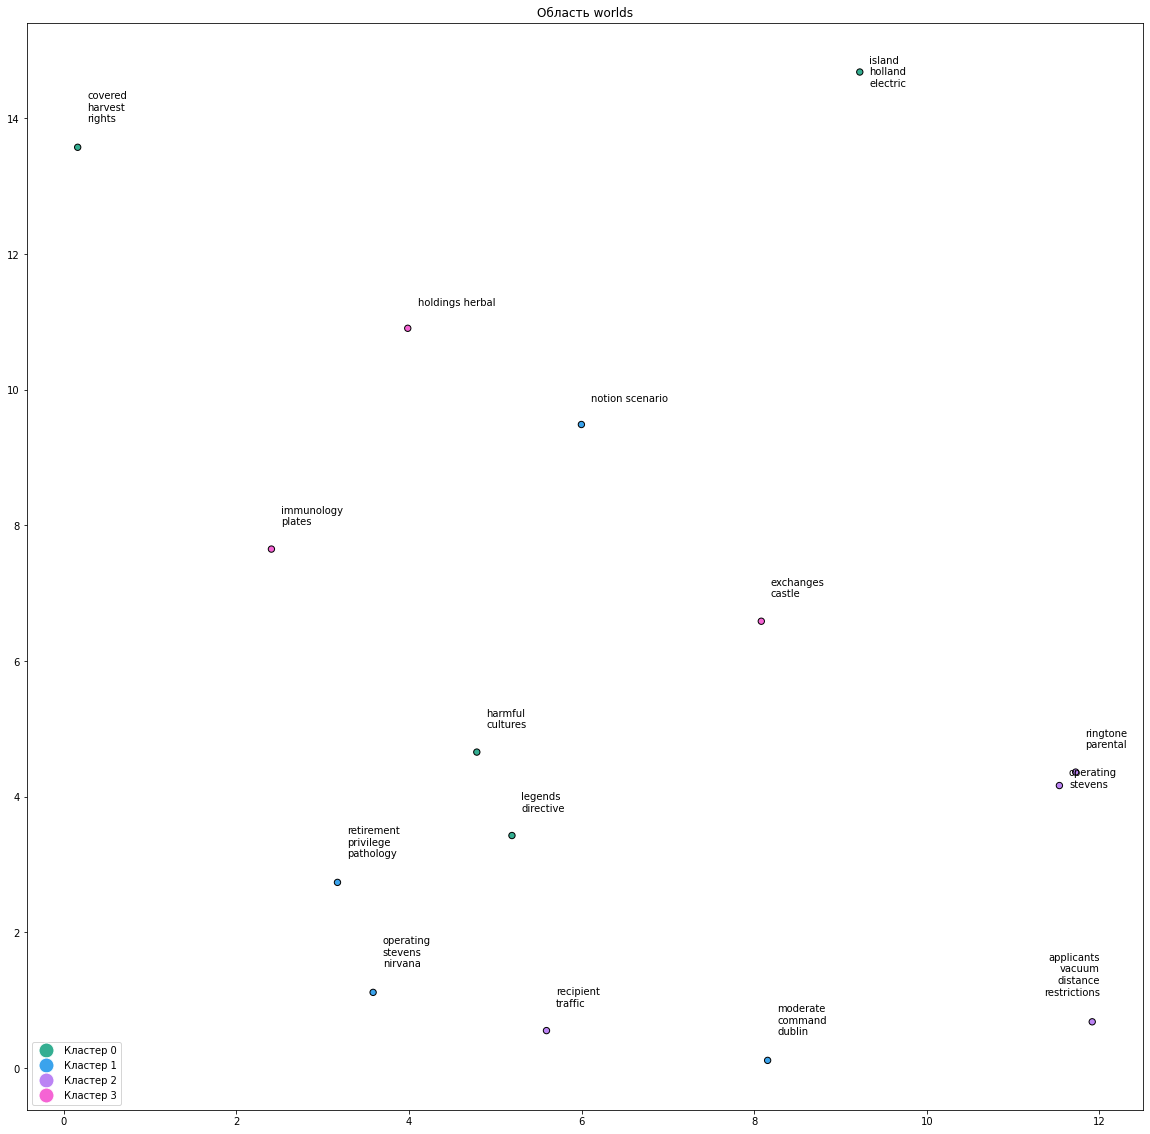

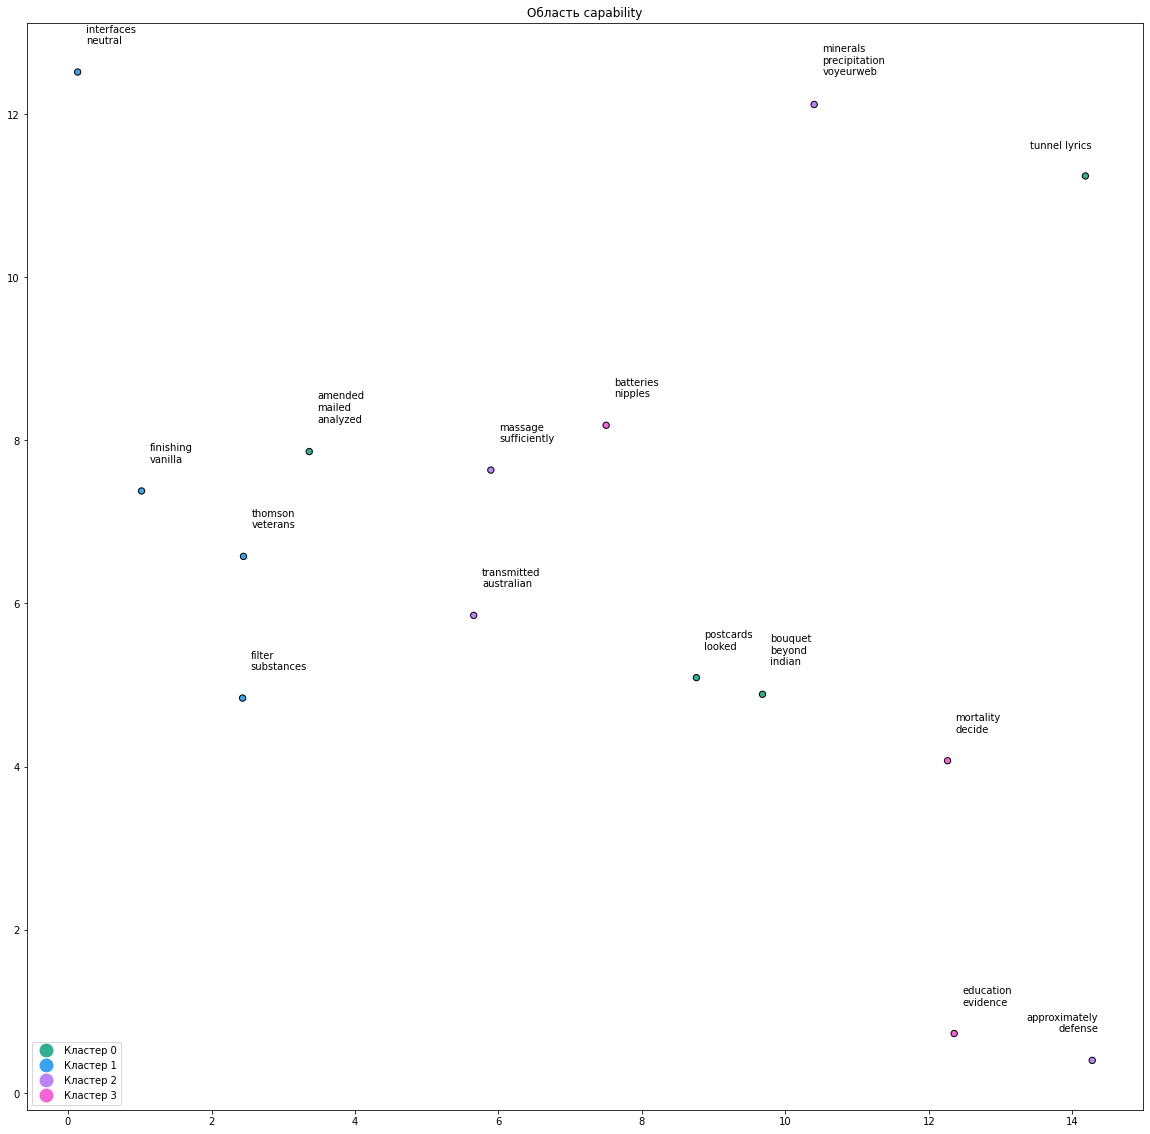

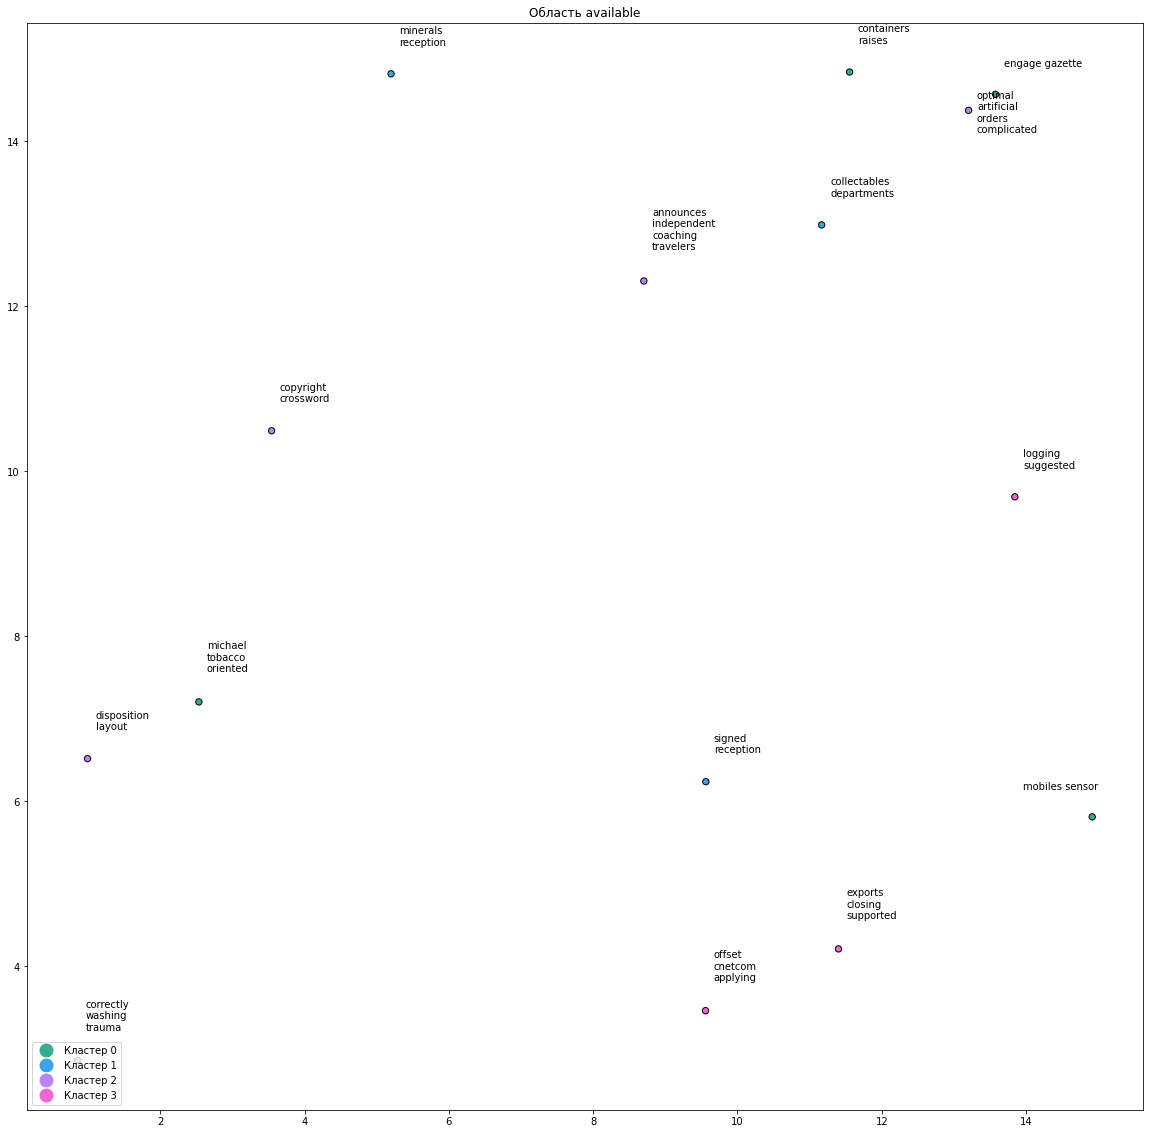

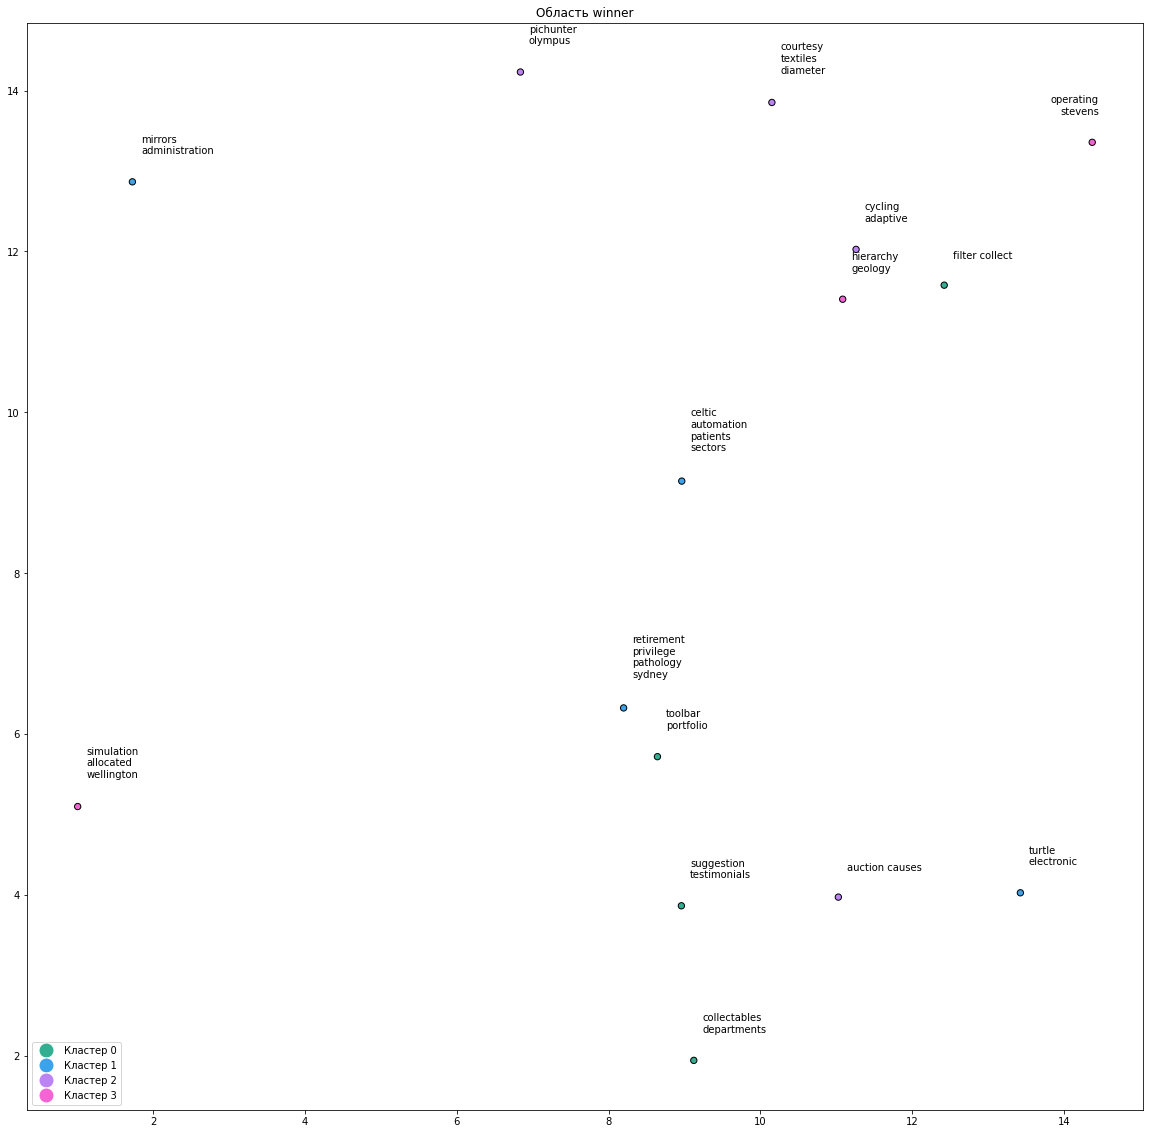

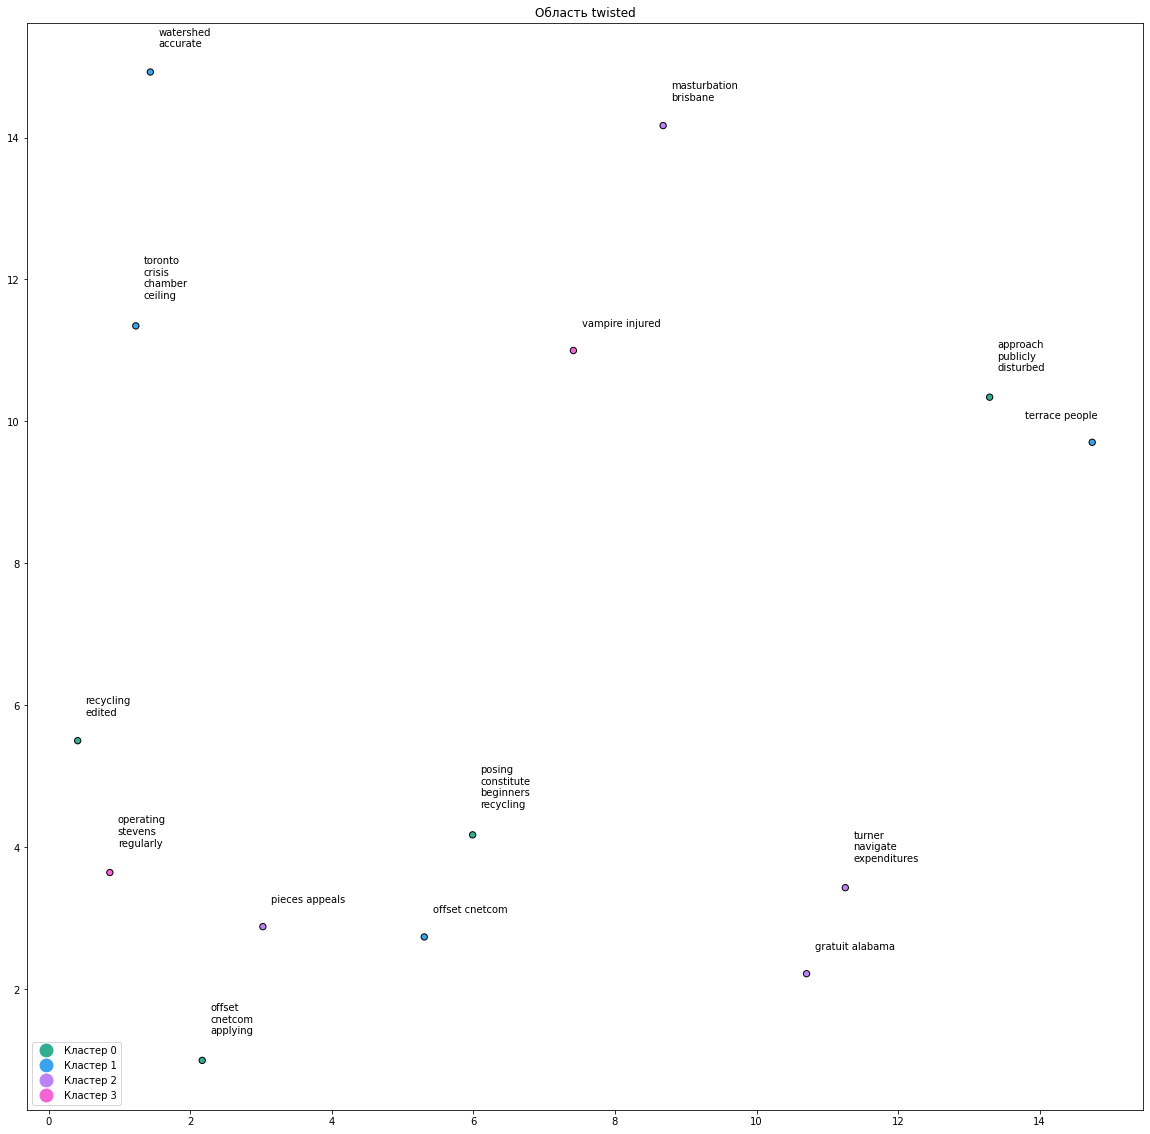

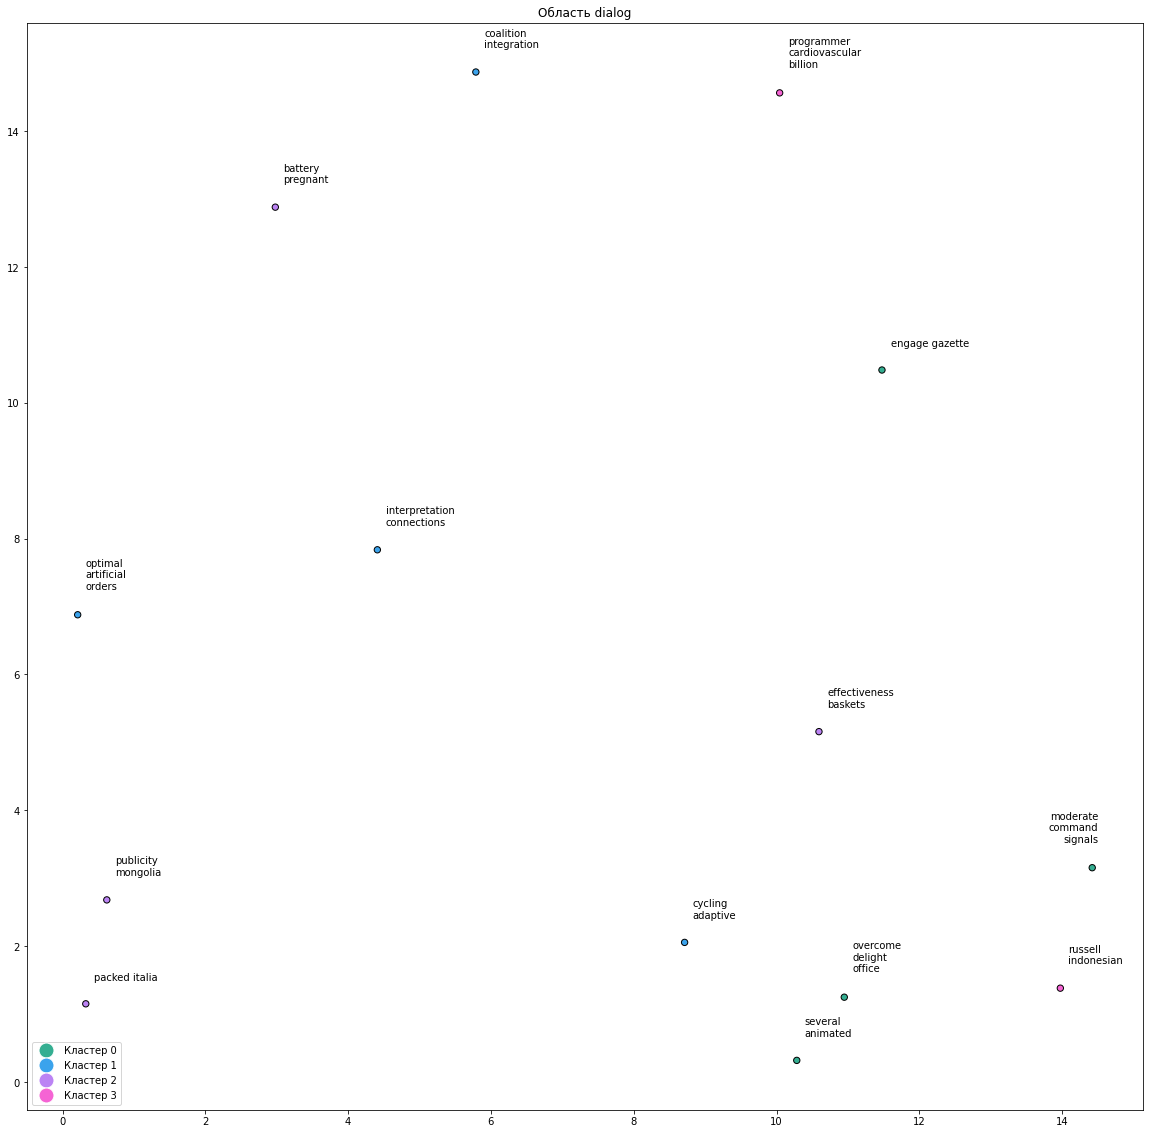

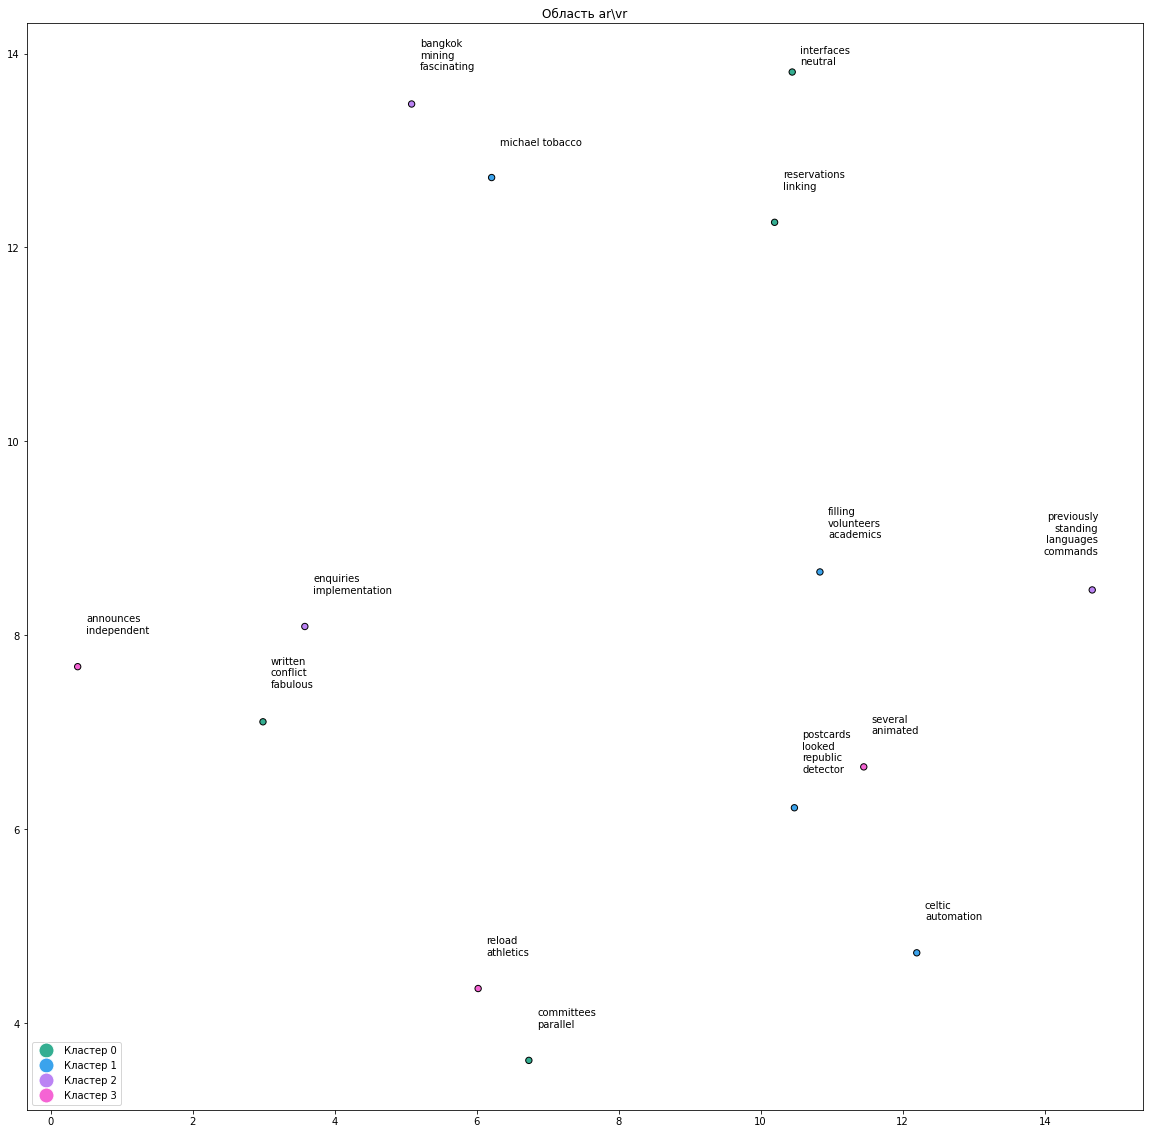

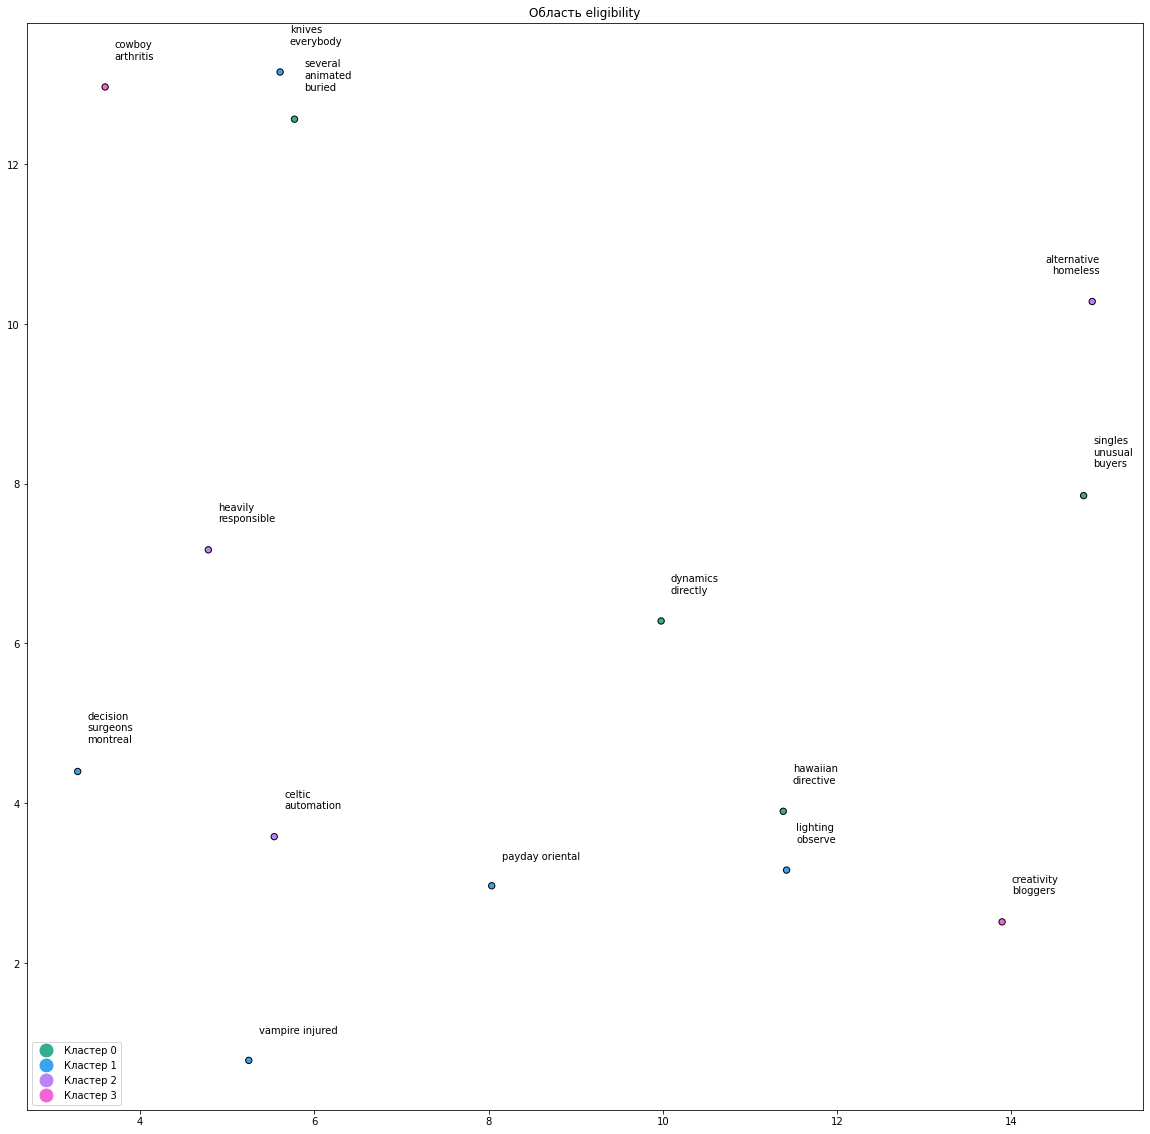

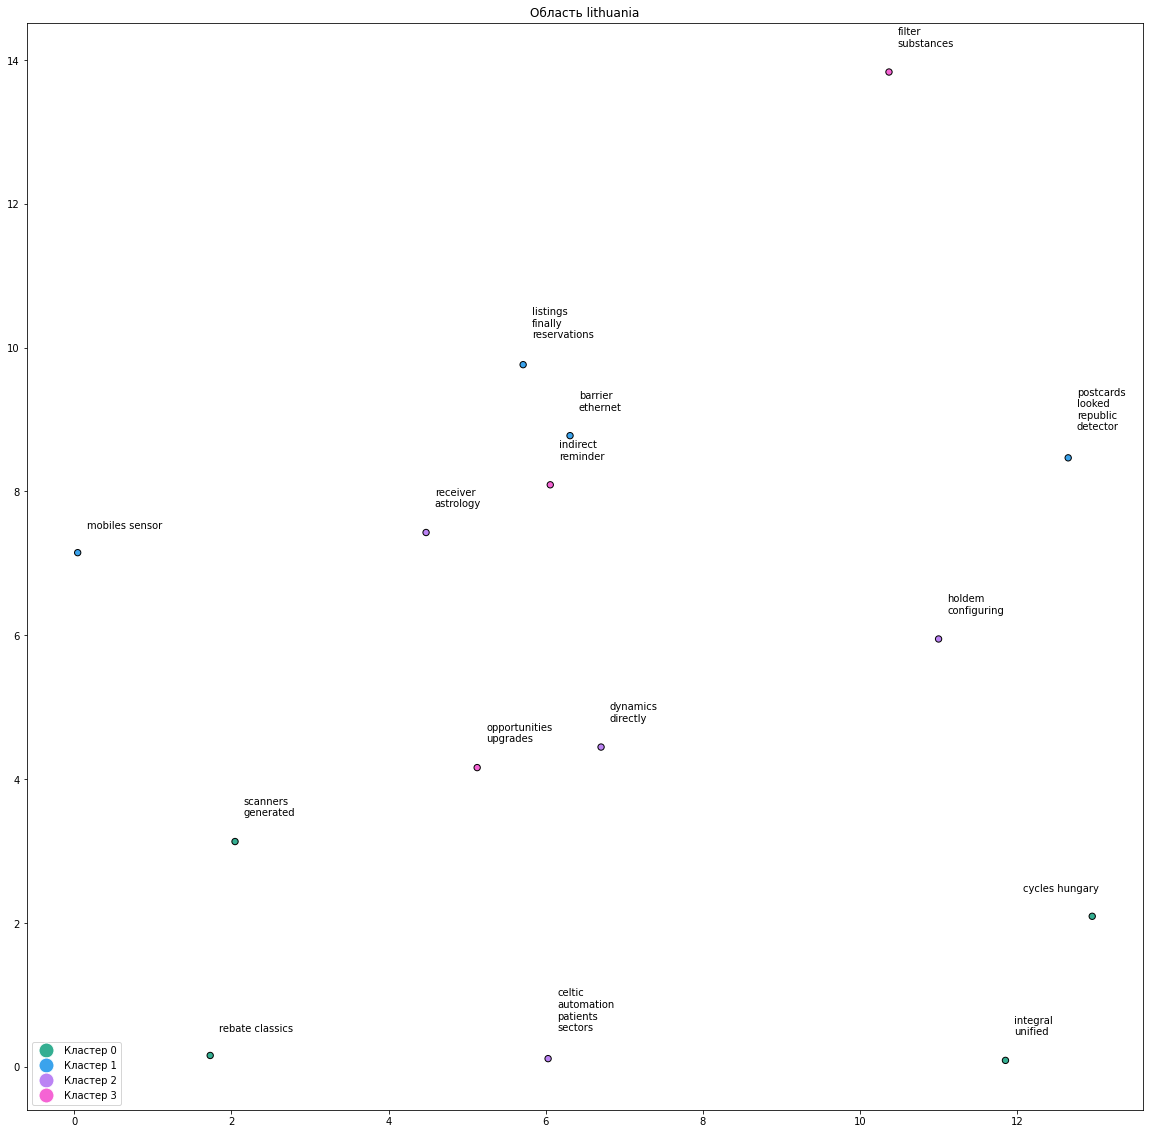

In [476]:
# Преобразуем формат хранения словосочетаний для удобства визуализации
# Длинные словосочетания (длиннее 15 символов), будут иметь перенос строки
df['keyword2'] = df.keyword.apply(lambda x: x if (len(x)<=15) else x.replace(' ', '\n'))
#Сформируем легенду цветов и кластеров
colors_dict = df[['cluster_name', 'color']].drop_duplicates().reset_index()
legend_elements = []
for i in range(colors_dict.shape[0]):
    legend_elements.append(Line2D([0], 
                                  [0], 
                                  marker='o', 
                                  color='w', 
                                  label=colors_dict.loc[i, 'cluster_name'],
                                  markerfacecolor=colors_dict.loc[i, 'color'], 
                                  markersize=15))
    
for n, j in enumerate(list(set(df.area))):
    plt.figure(figsize=(20,20))
    df_ = df[df.area==j].copy()
    plt.title(f"""Область {j}""")
    plt.scatter(df_.x, df_.y, c=df_.color, edgecolors='black', label=df_.cluster_name, s=40)
    plt.legend(handles=legend_elements, loc='lower left')
    texts = []
    for i in df_.index:
        texts.append(plt.annotate(df_.keyword2.loc[i], 
                                           xy=(df_.x.loc[i], df_.y.loc[i]), 
                                           xytext=(df_.x.loc[i]+0.1, df_.y.loc[i]+.3)))
    #Предотвращаем "слипание" текста
    adjust_text(texts)
    if j=='ar\\vr':
        j='ar_vr'
    plt.savefig(j+'.png')